In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv("/content/500_Person_Gender_Height_Weight_Index.csv")

In [7]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
df['Height_meters'] = df['Height']/100
df['calculated_BMI'] = df['Weight']/(df['Height_meters']*df['Height_meters'])

df.head()

,Gender,Height,Weight,Index,Height_meters,calculated_BMI
0,Male,174,96,4,1.74,31.708284
1,Male,189,87,2,1.89,24.355421
2,Female,185,110,4,1.85,32.140248
3,Female,195,104,3,1.95,27.350427
4,Male,149,61,3,1.49,27.476240


In [9]:
m=df['Height'].max()
m

199

In [10]:
df['deviation_from_max_height'] = df['Height']-df['Height'].max()
df['deviation_from_min_weight'] = df['Weight']-df['Weight'].min()

df['deviation_from_avg_BMI'] = df['calculated_BMI']-df['calculated_BMI'].mean()
df.head()

,Gender,Height,Weight,Index,Height_meters,calculated_BMI,deviation_from_max_height,deviation_from_min_weight,deviation_from_avg_BMI
0,Male,174,96,4,1.74,31.708284,-25,46,-6.057000
1,Male,189,87,2,1.89,24.355421,-10,37,-13.409863
2,Female,185,110,4,1.85,32.140248,-14,60,-5.625036
3,Female,195,104,3,1.95,27.350427,-4,54,-10.414857
4,Male,149,61,3,1.49,27.476240,-50,11,-10.289044


In [95]:
data = pd.read_csv('/content/train (1).csv')

In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
null_pre= data['Age'].isnull().sum()
per=(null_pre/len(data['Age']))*100
per

19.865319865319865

In [18]:
null_pre= data['Cabin'].isnull().sum()
per=(null_pre/len(data['Cabin']))*100
per

77.10437710437711

## cabin column has more than 70% null values hance droping it

In [24]:
threshold = int(0.7 * data.shape[0])
threshold

623

In [27]:
data = data.dropna(axis=1, thresh=threshold)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Imputation

In [31]:
median=data['Age'].median()
median

28.0

In [32]:
data['Age']=data['Age'].fillna(median)

In [33]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


## Categorical imputation

In [41]:
mode=data['Embarked'].mode()[0] #[0] indexing value we put to get only the mode value
mode

'S'

In [42]:
data['Embarked']=data['Embarked'].fillna(mode)

In [43]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Outliers

In [44]:
new_df = data

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [47]:

factor=3
mean=new_df['Fare'].mean()
std=new_df['Fare'].std()
print(mean)
print(std)

32.204207968574636
49.6934285971809


In [48]:
upper_limit= mean+std*factor
lower_limit=mean-std*factor
print(upper_limit)
print(lower_limit)

181.2844937601173
-116.87607782296804


## outliers detection

In [51]:
mask = (new_df['Fare']>upper_limit) | (new_df['Fare']<lower_limit)
new_df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S


In [57]:
mask = (new_df['Fare']<=upper_limit) & (new_df['Fare']>=lower_limit)
new_df1=new_df[mask]

In [54]:
new_df.shape

(891, 11)

In [58]:
new_df1.shape

(871, 11)

## Scaling

## Normalization

In [59]:
max= new_df1['Age'].max()
min = new_df1['Age'].min()
print(max)
print(min)

80.0
0.42


In [60]:
new_df1['Age']= (new_df1['Age'] - min) / (max - min)

<ipython-input-60-9ef43b375654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Age']= (new_df1['Age'] - min) / (max - min)


In [62]:
max1=new_df1['Fare'].max()
min1=new_df1['Fare'].min()
print(max1)
print(min1)

164.8667
0.0


In [63]:
new_df1['Fare'] = (new_df1['Fare']- min1) / (max1 - min1)

<ipython-input-63-880f71e47283>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Fare'] = (new_df1['Fare']- min1) / (max1 - min1)


In [64]:
new_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.043975,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.432369,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.048069,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.322078,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.048827,S


# Binning

In [65]:
new_df2=new_df

In [70]:
bins = [0,30,60,90]
bin_names= ["Adult", "Old", "Child"]

In [71]:
new_df2['Age_Group'] = pd.cut(new_df2['Age'], bins=bins, labels=bin_names)

In [72]:
new_df2['Age_Group'].value_counts()

,count
Age_Group,
Adult,586
Old,283
Child,22


# Encoding

In [75]:
new_df3=new_df

In [77]:
new_df3['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [78]:
new_df3['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [99]:
df_en=pd.get_dummies(data, columns=['Embarked'])
df_en.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


# Variable tranformation

In [108]:
import matplotlib.pyplot as plt
import scipy.stats as stats

kc = pd.read_csv('/content/kc_house_data.csv')

In [109]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


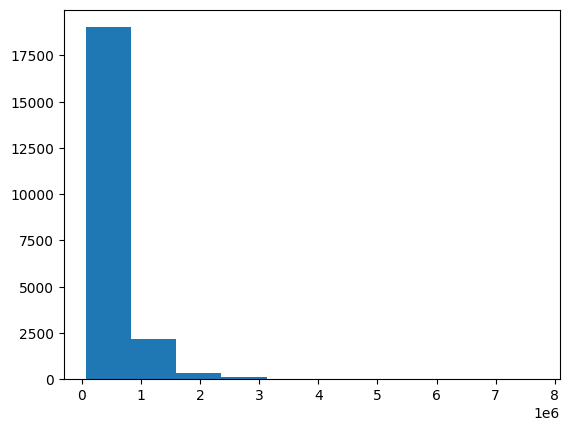

In [110]:
plt.hist(kc['price'])

plt.show()

In [111]:
kc['log_price']=np.log(kc['price']+1)

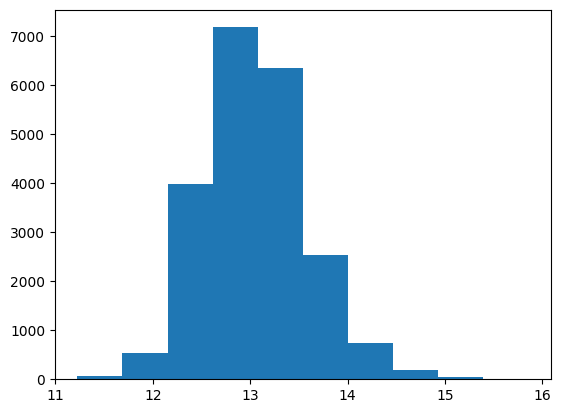

In [112]:
plt.hist(kc['log_price'])

plt.show()

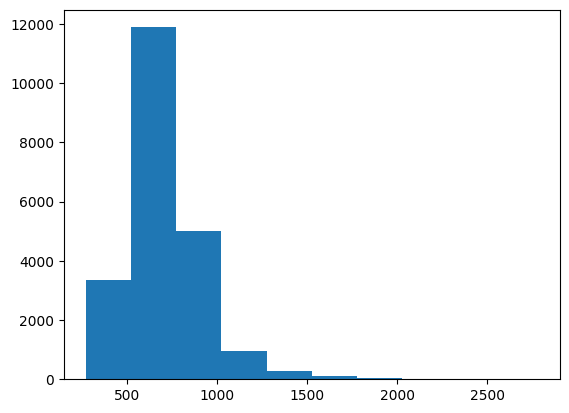

In [113]:
kc['Seq_price']=kc['price']**(1/2)
plt.hist(kc['Seq_price'])

plt.show()

# Date time

In [114]:
ft = pd.read_csv("/content/results.csv")

In [115]:
ft.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [116]:
import datetime

In [118]:
ft['date']

,date
0,1872-11-30
1,1873-03-08
2,1874-03-07
3,1875-03-06
4,1876-03-04
...,...
47593,2024-09-10
47594,2024-09-10
47595,2024-09-10
47596,2024-09-10


In [123]:
date = pd.to_datetime(ft['date'])

In [127]:
date1=date.dt.strftime('%y-%m-%d')
print(date1)

0        72-11-30
1        73-03-08
2        74-03-07
3        75-03-06
4        76-03-04
           ...   
47593    24-09-10
47594    24-09-10
47595    24-09-10
47596    24-09-10
47597    24-09-10
Name: date, Length: 47598, dtype: object
